In [1]:
import random

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc


import uproot 
import awkward as ak
import pickle

In [2]:
file = "/home/dejavu/Projects/qgcal/Training/dijet_sample_newBDT_flatten.npy"
all_jets = np.load(file)
all_jets[:, 0] = all_jets[:, 0]/1e3

all_jets.shape # Flatten events, need to reshape to split 
# leading, subleading
# forward, central


(72778406, 9)

In [6]:
def split_jet_type(jets):
    gluon_idx = np.where(jets[:,6]==21)[0]
    light_quark_idx = np.where((jets[:,6]==1) | (jets[:,6]==2)| (jets[:,6]==3))[0]
    c_quark_idx = np.where(jets[:,6]==4)[0]
    b_quark_idx = np.where(jets[:,6]==5)[0]
    data_idx = np.where(jets[:,6]==-9999)[0]
    others_idx = np.where(jets[:,6]==-1)[0]

    gluon = jets[gluon_idx]
    quark = jets[light_quark_idx]
    c_quark = jets[c_quark_idx]
    b_quark = jets[b_quark_idx]
    data = jets[data_idx]
    others = jets[others_idx]

    return [gluon, quark, c_quark, b_quark, data, others]

In [3]:
label_pt_bin = [500, 600, 800, 1000, 1200, 1500, 2000]
def split_jet_pt(jets):
    splited_jet_pt = {}
    for i, pt_start in enumerate(label_pt_bin[:-1]):
        pt_selected_idx = np.where((jets[:,0] >= pt_start) & (jets[:,0] < label_pt_bin[i+1]))[0]
        splited_jet_pt[pt_start] = jets[pt_selected_idx]

    return splited_jet_pt

In [4]:
splited_jet_pt = split_jet_pt(all_jets)

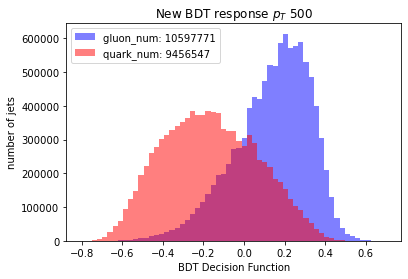

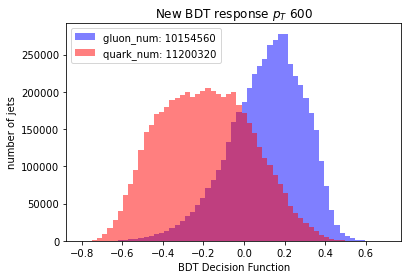

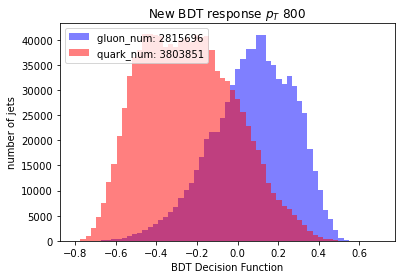

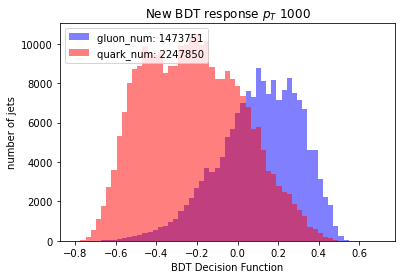

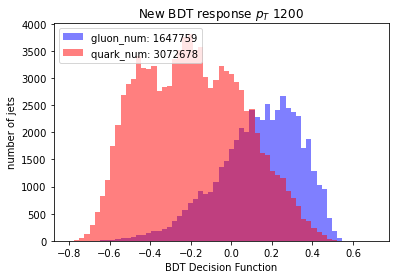

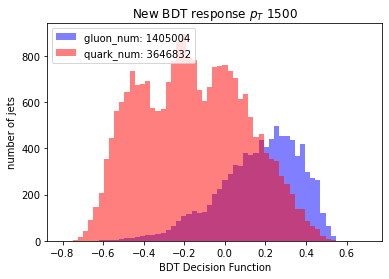

In [7]:
for k, splited_jet_pt_bin in splited_jet_pt.items():
    splited_pt_eta_jets_types = split_jet_type(splited_jet_pt_bin)
    
    bdt_axis = np.linspace(-0.8, 0.7, 60 )
    plt.hist(splited_pt_eta_jets_types[0][:,-1], 
            weights=splited_pt_eta_jets_types[0][:,-2], 
            bins= bdt_axis, alpha=0.5, 
            label='gluon'+f"_num: {len(splited_pt_eta_jets_types[0])}", color = 'blue') 
    plt.hist(splited_pt_eta_jets_types[1][:,-1], 
            weights=splited_pt_eta_jets_types[1][:,-2], 
            bins= bdt_axis, alpha=0.5, 
            label='quark'+f"_num: {len(splited_pt_eta_jets_types[1])}", color = 'red')
    plt.legend(loc='upper left')

    plt.xlabel("BDT Decision Function")
    plt.ylabel("number of jets")
    plt.title(r"New BDT response $p_T$" +f" {k}")
    # plt.savefig(f"plots_newTrainingPythia/BDT_dist_pt{k}")
    plt.show()


In [10]:
quark_1500 = split_jet_type(splited_jet_pt[1500])[1]

In [11]:
quark_1500.shape

(3646832, 9)

In [ ]:
branch_names = ["jet_pt", "jet_eta", "jet_nTracks", "jet_trackWidth", "jet_trackC1", 
                "jet_trackBDT", "jet_PartonTruthLabelID", "total_weight", "newBDTScore"]

[]

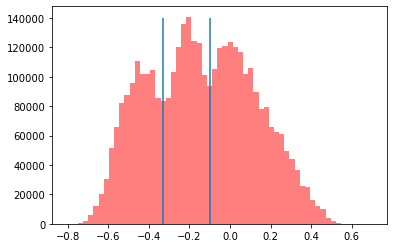

In [63]:
bdt_axis = np.linspace(-0.8, 0.7, 60 )
fig, ax = plt.subplots()
ax.hist(quark_1500[:,8], bins = bdt_axis, alpha=0.5, color="red")
ax.vlines(x = -0.33, ymin = 0, ymax=140000)
ax.vlines(x = -0.1, ymin = 0, ymax=140000)
ax.plot()

[]

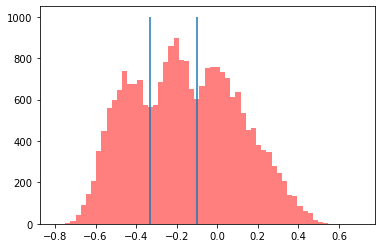

In [64]:
bdt_axis = np.linspace(-0.8, 0.7, 60 )
fig, ax = plt.subplots()
ax.hist(quark_1500[:,8], weights=quark_1500[:,7], bins = bdt_axis, alpha=0.5, color="red")
ax.vlines(x = -0.33, ymin = 0, ymax=1000)
ax.vlines(x = -0.1, ymin = 0, ymax=1000)
ax.plot()

[]

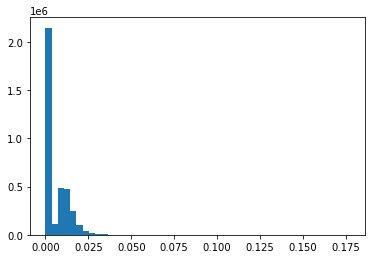

In [68]:
fig, ax = plt.subplots()
weight_max = np.max(quark_1500[:,7])
ax.hist(quark_1500[:,7], bins=np.linspace(0,weight_max,50))
ax.plot()

In [53]:
bdt_region_cuts = [-0.8, -0.33, -0.1, 0.7] 
def split_jet_bdt_regions(jets):
    splited_jet_bdt_regions = {}
    for i, bdt_start in enumerate(bdt_region_cuts[:-1]):
        bdt_selected_idx = np.where((jets[:,8] >= bdt_start) & (jets[:,8] < bdt_region_cuts[i+1]))[0]
        splited_jet_bdt_regions[i] = jets[bdt_selected_idx]

    return splited_jet_bdt_regions

In [54]:
splited_jet_bdt_regions = split_jet_bdt_regions(quark_1500)

In [55]:
len(quark_1500) == len(splited_jet_bdt_regions[0]) + len(splited_jet_bdt_regions[1]) + len(splited_jet_bdt_regions[2])

True

In [38]:
user_range = [(1500, 2000), (-3, 3), (0, 100), (-0.1, 0.4), (-0.1, 0.5), (-1.0, 1.0)]
user_xlabel = ["Jet $p_{\mathrm{T}}$ [GeV]", "$\eta$", "Number of tracks", "$W_{jet}$", "$C_1$", "BDT Score"]
user_filename = ["dis_jetpt", "dis_eta", "dis_ntracks", "dis_width", "dis_c1", "dis_bdt"]

## Inclusive distribution

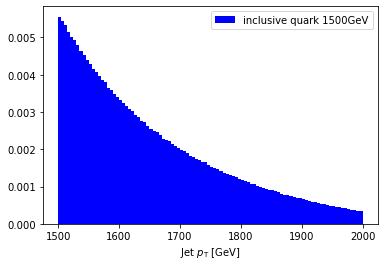

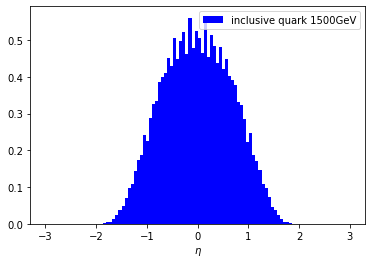

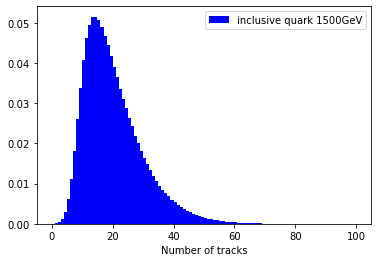

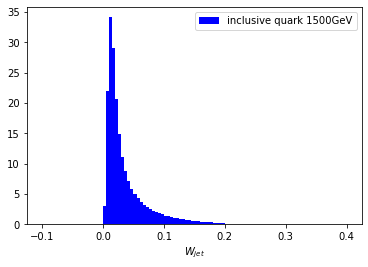

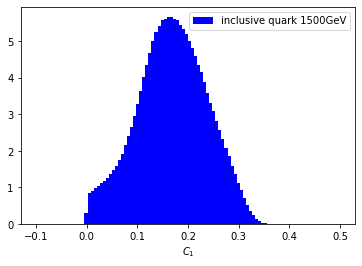

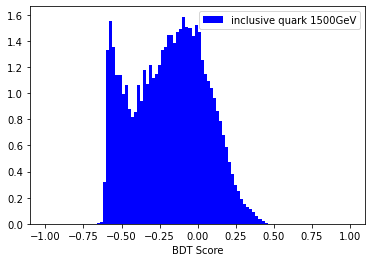

In [56]:
for i in range(6):

    fig, ax = plt.subplots()
    user_bins = np.linspace(user_range[i][0], user_range[i][1], 101)
    ax.hist(quark_1500[:,i], weights = quark_1500[:,7], bins = user_bins,
            density= True, label = f"inclusive quark 1500GeV", color = "blue")

    ax.legend()
    ax.set_xlabel(user_xlabel[i])
    ax.plot()

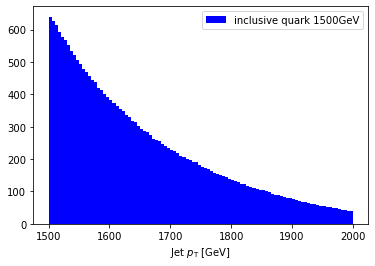

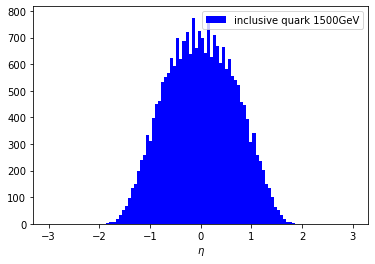

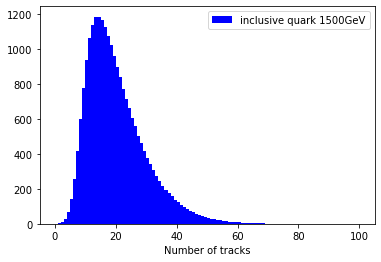

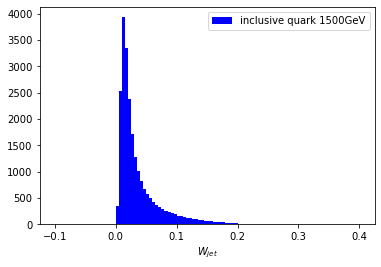

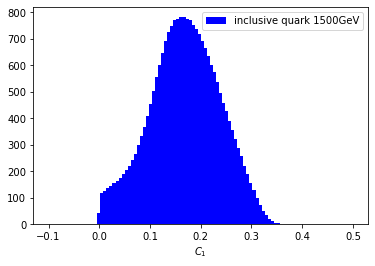

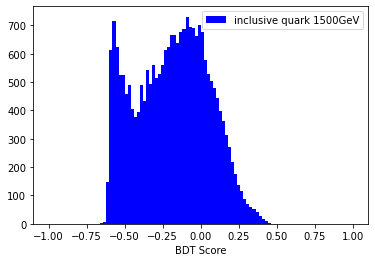

In [57]:
for i in range(6):

    fig, ax = plt.subplots()
    user_bins = np.linspace(user_range[i][0], user_range[i][1], 101)
    ax.hist(quark_1500[:,i], weights = quark_1500[:,7], bins = user_bins,
            density= False, label = f"inclusive quark 1500GeV", color = "blue")

    ax.legend()
    ax.set_xlabel(user_xlabel[i])
    ax.plot()

## Compare shape with normalization

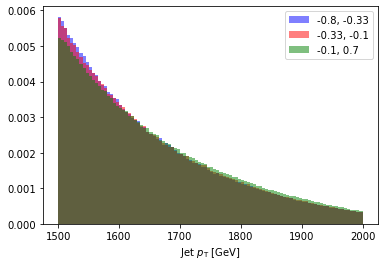

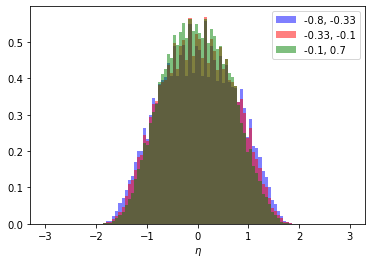

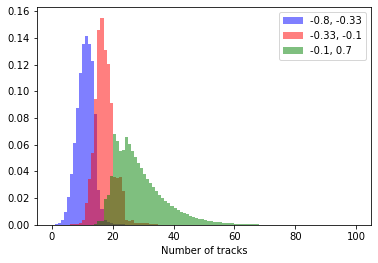

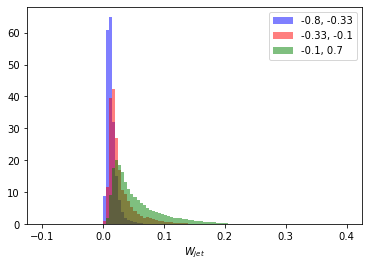

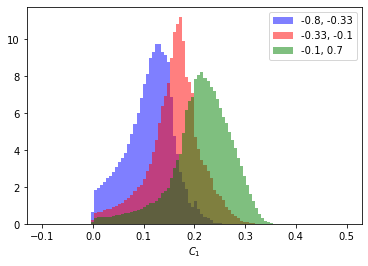

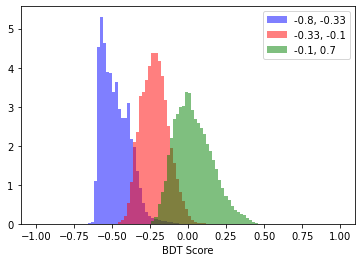

In [58]:
for i in range(6):

    fig, ax = plt.subplots()
    user_bins = np.linspace(user_range[i][0], user_range[i][1], 101)
    ax.hist(splited_jet_bdt_regions[0][:,i], weights = splited_jet_bdt_regions[0][:,7], bins = user_bins,
            density= True, alpha=0.5, label = f"{bdt_region_cuts[0]}, {bdt_region_cuts[1]}", color = "blue")
    ax.hist(splited_jet_bdt_regions[1][:,i], weights = splited_jet_bdt_regions[1][:,7], bins = user_bins,
            density= True, alpha=0.5, label = f"{bdt_region_cuts[1]}, {bdt_region_cuts[2]}", color = "red")
    ax.hist(splited_jet_bdt_regions[2][:,i], weights = splited_jet_bdt_regions[2][:,7], bins = user_bins,
            density= True, alpha=0.5, label = f"{bdt_region_cuts[2]}, {bdt_region_cuts[3]}", color = "green")

    ax.legend()
    ax.set_xlabel(user_xlabel[i])
    ax.plot()




## Compare shape w/o normalization

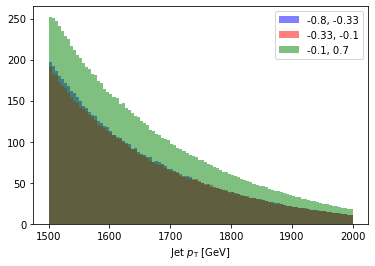

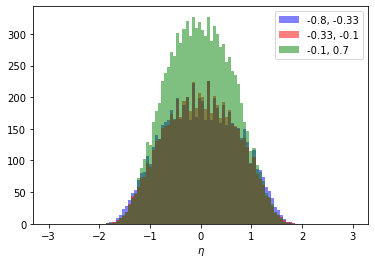

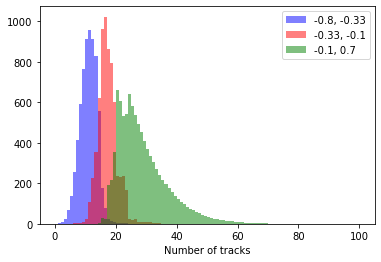

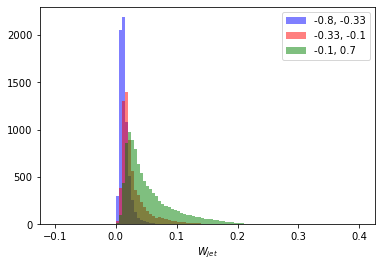

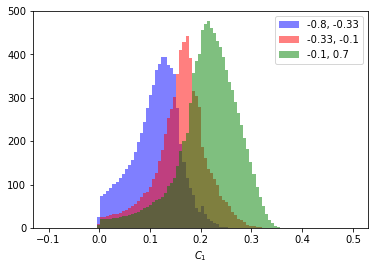

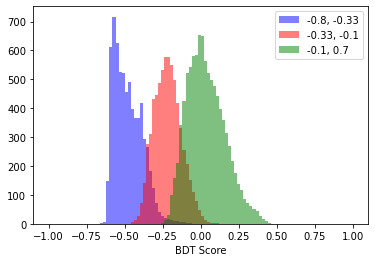

In [59]:
for i in range(6):

    fig, ax = plt.subplots()
    user_bins = np.linspace(user_range[i][0], user_range[i][1], 101)
    ax.hist(splited_jet_bdt_regions[0][:,i], weights = splited_jet_bdt_regions[0][:,7], bins = user_bins,
            density= False, alpha=0.5, label = f"{bdt_region_cuts[0]}, {bdt_region_cuts[1]}", color = "blue")
    ax.hist(splited_jet_bdt_regions[1][:,i], weights = splited_jet_bdt_regions[1][:,7], bins = user_bins,
            density= False, alpha=0.5, label = f"{bdt_region_cuts[1]}, {bdt_region_cuts[2]}", color = "red")
    ax.hist(splited_jet_bdt_regions[2][:,i], weights = splited_jet_bdt_regions[2][:,7], bins = user_bins,
            density= False, alpha=0.5, label = f"{bdt_region_cuts[2]}, {bdt_region_cuts[3]}", color = "green")

    ax.legend()
    ax.set_xlabel(user_xlabel[i])
    ax.plot()




## Stacked Plot

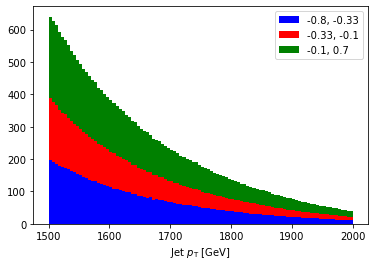

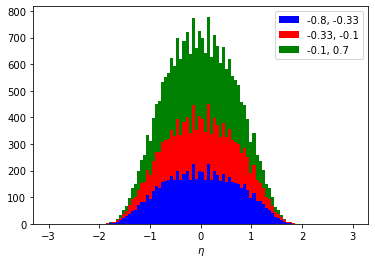

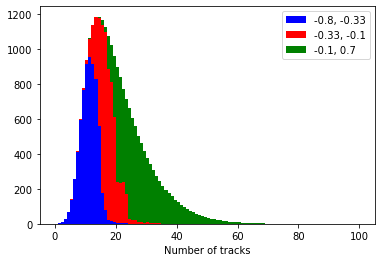

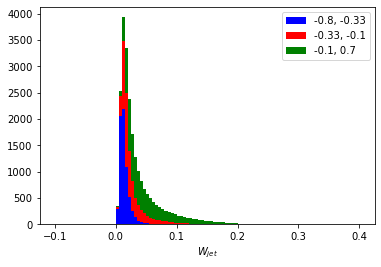

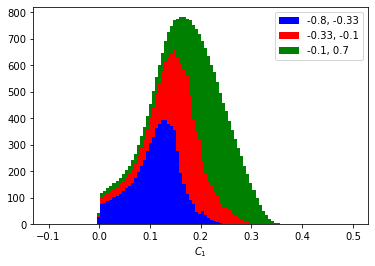

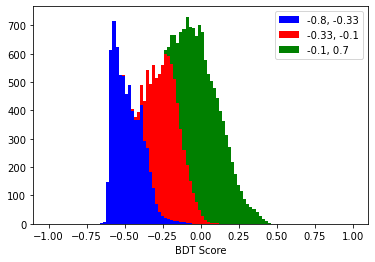

In [60]:
for i in range(6):
    fig, ax = plt.subplots()
    user_bins = np.linspace(user_range[i][0], user_range[i][1], 101)
    ax.hist([splited_jet_bdt_regions[0][:,i], splited_jet_bdt_regions[1][:,i], splited_jet_bdt_regions[2][:,i] ],
            weights = [splited_jet_bdt_regions[0][:,7], splited_jet_bdt_regions[1][:,7], splited_jet_bdt_regions[2][:,7] ], 
            bins = user_bins, stacked= True,
            density= False,
            label = [f"{bdt_region_cuts[0]}, {bdt_region_cuts[1]}", f"{bdt_region_cuts[1]}, {bdt_region_cuts[2]}", f"{bdt_region_cuts[2]}, {bdt_region_cuts[3]}"], 
            color = ["blue", "red", "green"])

    ax.legend()
    ax.set_xlabel(user_xlabel[i])
    ax.plot()


